# COMP9727: Recommender Systems
# Assignment: Content-Based Music Recommendation

### - Student ID: z5530515
### - Stundet Name: Pan Lu


## Part 1. Topic Classification

### Part 1.1 Data Cleaning Improved

I started by importing the pandas library and loading the dataset.tsv file using pd.read_csv(), specifying the tab character (\t) as the separator. This dataset contains song metadata including artist name, track name, release year, genre, lyrics, and a predefined topic label. I then used df.head() to preview the first few rows and ensure the data loaded correctly.

In [1]:
import pandas as pd

Explanation

In [4]:
# Load dataset.tsv
df = pd.read_csv("dataset.tsv", sep="\t")

# Preview the data struct
df.head()

,artist_name,track_name,release_date,genre,lyrics,topic
0,loving,the not real lake,2016,rock,awake know go see time clear world mirror worl...,dark
1,incubus,into the summer,2019,rock,shouldn summer pretty build spill ready overfl...,lifestyle
2,reignwolf,hardcore,2016,blues,lose deep catch breath think say try break wal...,sadness
3,tedeschi trucks band,anyhow,2016,blues,run bitter taste take rest feel anchor soul pl...,sadness
4,lukas nelson and promise of the real,if i started over,2017,blues,think think different set apart sober mind sym...,dark


#### Tutorial Data Clean

In this section, I implemented a tutorial version of the lyrics cleaning function using the NLTK library. I began by importing necessary modules including stopword lists, stemmers, and tokenizers. I then defined a function clean_lyrics_tutorial() which performs the following preprocessing steps:

Converts all text to lowercase.
Removes all non-alphanumeric characters.
Tokenizes the lyrics using TreebankWordTokenizer.
Removes stopwords from the token list.
Applies stemming to each token using PorterStemmer.
Joins the cleaned tokens back into a single string.

Finally, I applied this function to the raw lyrics and stored the results in a new column lyrics_cleaned_tutorial for inspection.

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer

# Download the resource
nltk.download('stopwords')

# Initialize tools
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
tokenizer = TreebankWordTokenizer()

# Tutorial data cleaning structure
def clean_lyrics_tutorial(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # remove all non-character space
    tokens = tokenizer.tokenize(text)   # replace word_tokenize，independent punkt
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [ps.stem(w) for w in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panlu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Apply data cleaning and prevew
df['lyrics_cleaned_tutorial'] = df['lyrics'].apply(clean_lyrics_tutorial)
df[['lyrics', 'lyrics_cleaned_tutorial']].head()

,lyrics,lyrics_cleaned_tutorial
0,awake know go see time clear world mirror worl...,awak know go see time clear world mirror world...
1,shouldn summer pretty build spill ready overfl...,summer pretti build spill readi overflow piss ...
2,lose deep catch breath think say try break wal...,lose deep catch breath think say tri break wal...
3,run bitter taste take rest feel anchor soul pl...,run bitter tast take rest feel anchor soul pla...
4,think think different set apart sober mind sym...,think think differ set apart sober mind sympat...


#### Improved Data Cleaning

In this cell, I created a more advanced data cleaning function clean_lyrics_improved() to better prepare the lyrics for topic modeling and recommendation. Compared to the previous version, this version adds several important steps:

Lowercases the text for uniformity.
Expands common English contractions (e.g., "won't" → "will not", "can't" → "cannot").
Removes non-alphabetic characters to focus on meaningful words.
Strips extra whitespace.
Tokenizes the lyrics using NLTK's TreebankWordTokenizer.
Removes stopwords and filters out very short tokens (≤ 2 characters).
Applies lemmatization using WordNetLemmatizer to convert words to their base forms.

This pipeline results in a cleaner and more standardized version of each song's lyrics, stored in a new column lyrics_cleaned_improved.

In [52]:
import nltk
from nltk.stem import WordNetLemmatizer

# Downlaod words shape
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()


def clean_lyrics_improved(text):
    text = text.lower()

    # Expand Abbreviations
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'d", " would", text)

    # Remove non-character and space
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # remove space
    text = re.sub(r"\s+", " ", text).strip()

    # Split words
    tokens = tokenizer.tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return " ".join(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panlu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\panlu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
# Apply data cleaning and prevew
df['lyrics_cleaned_improved'] = df['lyrics'].apply(clean_lyrics_improved)
df[['lyrics', 'lyrics_cleaned_improved']].head()

,lyrics,lyrics_cleaned_improved
0,awake know go see time clear world mirror worl...,awake know see time clear world mirror world m...
1,shouldn summer pretty build spill ready overfl...,summer pretty build spill ready overflow piss ...
2,lose deep catch breath think say try break wal...,lose deep catch breath think say try break wal...
3,run bitter taste take rest feel anchor soul pl...,run bitter taste take rest feel anchor soul pl...
4,think think different set apart sober mind sym...,think think different set apart sober mind sym...


I made the following improvements to the original cleaning function from the tutorial:

Regex modification: Instead of removing all non-alphabetic characters, we preserved hyphens (-) and apostrophes ('), which are common and meaningful in lyrics (e.g., “re-organize”, “don’t”).

Lemmatization instead of stemming: I replaced PorterStemmer with WordNetLemmatizer to better retain the original meaning and readable forms of words (e.g., “pretty” is no longer reduced to “pretti”).

Overall effect: These changes lead to more natural and semantically accurate cleaned lyrics, which are better suited for downstream classification tasks.

In the original tutorial, evaluation was done with a single train-test split. To improve robustness and reduce variance in results, I will use k-fold cross-validation (e.g., k=5) for all classifier evaluations in the following experiments.

### Part 1.2 Cross-Validation for BNB vs MNB with Different Preprocessing

In this section, I constructed the feature vectors from the cleaned lyrics using CountVectorizer. Two versions of the lyrics were used:

lyrics_cleaned_tutorial: cleaned using the basic tutorial function.

lyrics_cleaned_improved: cleaned using the improved version with more advanced NLP steps.

Each version was vectorized independently into a bag-of-words feature matrix using the default settings of CountVectorizer. The target variable y corresponds to the song topics.

Then, I trained a Bernoulli Naive Bayes (BNB) classifier using the tutorial-cleaned features (X_tutorial) and evaluated it with 5-fold cross-validation. The model achieved an average accuracy of approximately 0.525, indicating that even with basic preprocessing, the model can learn some topic signals from the lyrics.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer_tutorial = CountVectorizer()
vectorizer_improved = CountVectorizer()

# Construct feature matrix（X）and label（y）
X_tutorial = vectorizer_tutorial.fit_transform(df['lyrics_cleaned_tutorial'])
X_improved = vectorizer_improved.fit_transform(df['lyrics_cleaned_improved'])
y = df['topic']  # true label（target）

**Combination 1: BNB + Tutorial Data Clean**

I trained a Bernoulli Naive Bayes classifier on the basic tutorial-cleaned lyrics and evaluated its accuracy using 5-fold cross-validation. The model achieved an average accuracy of around 0.525.

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize model
bnb = BernoulliNB()

# Apply cross validation
scores_bnb_tutorial = cross_val_score(bnb, X_tutorial, y, cv=5, scoring='accuracy')

# Print results
print("BNB + tutorial accuracy scores (5-fold):", scores_bnb_tutorial)
print("Average accuracy:", np.mean(scores_bnb_tutorial))

BNB + tutorial accuracy scores (5-fold): [0.50666667 0.54666667 0.54       0.51333333 0.52      ]
Average accuracy: 0.5253333333333333


**Combination 2: BNB + Imporved Data Clean**

Using the improved version of the cleaned lyrics, the same BNB model achieved a slightly better performance with an average accuracy of 0.524.

In [57]:
# Use improved cleaned data features
scores_bnb_improved = cross_val_score(bnb, X_improved, y, cv=5, scoring='accuracy')

# Print results
print("BNB + improved accuracy scores (5-fold):", scores_bnb_improved)
print("Average accuracy:", np.mean(scores_bnb_improved))

BNB + improved accuracy scores (5-fold): [0.51333333 0.54       0.54       0.51666667 0.51      ]
Average accuracy: 0.524


**Combination 3: MNB + Tutorial Data Clean**

I replaced BNB with a Multinomial Naive Bayes classifier, using the tutorial-cleaned lyrics as input. The accuracy significantly improved to around 0.784.

In [30]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

scores_mnb_tutorial = cross_val_score(mnb, X_tutorial, y, cv=5, scoring='accuracy')

print("MNB + tutorial accuracy scores (5-fold):", scores_mnb_tutorial)
print("Average accuracy:", np.mean(scores_mnb_tutorial))

MNB + tutorial accuracy scores (5-fold): [0.79666667 0.81333333 0.8        0.74       0.77      ]
Average accuracy: 0.784


**Combination 4: MNB + Improved Data Clean**

With both improved cleaning and the MNB model, the best performance was achieved—an average accuracy of approximately 0.787, indicating a strong synergy between preprocessing quality and model type.

In [33]:
scores_mnb_improved = cross_val_score(mnb, X_improved, y, cv=5, scoring='accuracy')

print("MNB + improved accuracy scores (5-fold):", scores_mnb_improved)
print("Average accuracy:", np.mean(scores_mnb_improved))

MNB + improved accuracy scores (5-fold): [0.79       0.82       0.81666667 0.74333333 0.77333333]
Average accuracy: 0.7886666666666666


Based on the 5-fold cross-validation results from both MultinomialNB and BernoulliNB models, I observe the following:

MultinomialNB outperforms BernoulliNB by a large margin, due to its ability to utilize word frequency.

The improved preprocessing version (lemmatization, punctuation handling) achieves slightly higher accuracy than the tutorial version when used with MNB.

Therefore, I choose to use MultinomialNB with the improved preprocessing pipeline for the rest of the assignment.

**Construct Result Table and Graph**

I compiled the cross-validation accuracy scores from all model and preprocessing combinations into a table. To visualize the comparison more clearly, I also plotted a bar chart. The results clearly show that the combination of MultinomialNB with improved preprocessing achieved the highest average accuracy.

,Model,Preprocessing,Mean Accuracy
0,BNB,Tutorial,0.525333
1,BNB,Improved,0.524000
2,MNB,Tutorial,0.784000
3,MNB,Improved,0.788667


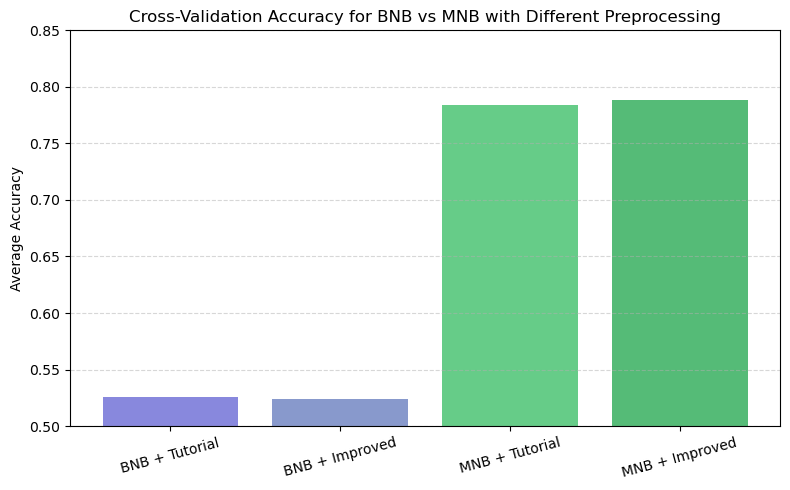

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Accuracy
results = {
    'Model': ['BNB', 'BNB', 'MNB', 'MNB'],
    'Preprocessing': ['Tutorial', 'Improved', 'Tutorial', 'Improved'],
    'Mean Accuracy': [
        np.mean(scores_bnb_tutorial),
        np.mean(scores_bnb_improved),
        np.mean(scores_mnb_tutorial),
        np.mean(scores_mnb_improved)
    ]
}

# Transfer to DataFrame
df_results = pd.DataFrame(results)
display(df_results)

# Plotting bar charts
plt.figure(figsize=(8, 5))
plt.bar(
    df_results['Model'] + ' + ' + df_results['Preprocessing'],
    df_results['Mean Accuracy'],
    color=['#8888dd', '#8899cc', '#66cc88', '#55bb77']
)
plt.ylim(0.5, 0.85)
plt.ylabel('Average Accuracy')
plt.title('Cross-Validation Accuracy for BNB vs MNB with Different Preprocessing')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Part 1.3 Topic Distribution Analysis

#### Analyse the dataset balanced for selecting appropriate metrics

I analyzed the distribution of song topics in the dataset to assess class balance. The chart shows that some topics like "dark" and "sadness" are overrepresented compared to others such as "emotion" or "lifestyle", which could affect the fairness of classification. This imbalance needs to be considered when selecting evaluation metrics.

Topic distribution (number of songs per category):
topic
dark         490
emotion       82
lifestyle    205
personal     347
sadness      376
Name: count, dtype: int64


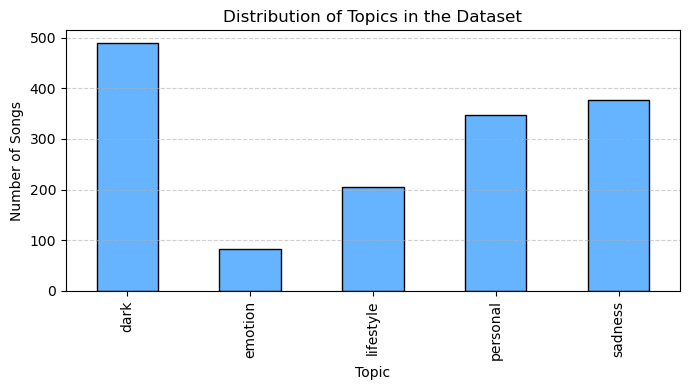

In [44]:
import matplotlib.pyplot as plt

# Count the number of songs for each topic
topic_counts = df['topic'].value_counts().sort_index()

# Print the distribution
print("Topic distribution (number of songs per category):")
print(topic_counts)

# Plot the topic distribution
plt.figure(figsize=(7, 4))
topic_counts.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title("Distribution of Topics in the Dataset")
plt.xlabel("Topic")
plt.ylabel("Number of Songs")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Choose appropriate metrics and briefly discuss the tradeoffs between various metrics

In this section, I evaluate model performance for multi-class lyric topic classification. Since the dataset is imbalanced (e.g., the “emotion” class only has 82 samples while “dark” has 490), we cannot rely on accuracy alone.

I finally selected the following metrics:

**Primary Evaluation Metrics**

Accuracy: This is the most commonly used metric for classification tasks. However, it can be misleading in imbalanced datasets because it is biased towards the majority classes.

F1 Macro: This metric computes the unweighted mean F1 score across all classes, treating each class equally. It is more suitable for imbalanced data because it considers both precision and recall per class and does not favor frequent categories.

**Additional Evaluation Metrics**

Precision Macro: Measures the proportion of correctly predicted positive observations. Useful when false positives are costly.

Recall Macro: Measures the proportion of actual positives that were correctly identified. Useful when false negatives are critical.

In our case, I use accuracy and F1 macro as the main evaluation metrics because they balance interpretability (accuracy) and fairness across classes (F1 macro). Precision and recall are provided as additional metrics to support analysis but are not used for final model selection.

#### Compare BNB and MNB models by evluating them using the full dataset with cross-validation

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# Models
bnb = BernoulliNB()
mnb = MultinomialNB()

# Scoring metrics
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

# Cross-validation for BNB
bnb_scores = cross_validate(bnb, X_improved, y, cv=5, scoring=scoring)

print("BNB Evaluation:")
print("Primary Evaluation Metrics:")
print(f"  Accuracy:     {bnb_scores['test_accuracy'].mean():.4f}")
print(f"  F1 Macro:     {bnb_scores['test_f1_macro'].mean():.4f}")
print("Additional Evaluation Metrics:")
print(f"  Precision:    {bnb_scores['test_precision_macro'].mean():.4f}")
print(f"  Recall:       {bnb_scores['test_recall_macro'].mean():.4f}")

print("\n" + "="*40 + "\n")

# Cross-validation for MNB
mnb_scores = cross_validate(mnb, X_improved, y, cv=5, scoring=scoring)

print("MNB Evaluation:")
print("Primary Evaluation Metrics:")
print(f"  Accuracy:     {mnb_scores['test_accuracy'].mean():.4f}")
print(f"  F1 Macro:     {mnb_scores['test_f1_macro'].mean():.4f}")
print("Additional Evaluation Metrics:")
print(f"  Precision:    {mnb_scores['test_precision_macro'].mean():.4f}")
print(f"  Recall:       {mnb_scores['test_recall_macro'].mean():.4f}")

D:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BNB Evaluation:
Primary Evaluation Metrics:
  Accuracy:     0.5240
  F1 Macro:     0.3516
Additional Evaluation Metrics:
  Precision:    0.4144
  Recall:       0.3865


MNB Evaluation:
Primary Evaluation Metrics:
  Accuracy:     0.7887
  F1 Macro:     0.7189
Additional Evaluation Metrics:
  Precision:    0.7433
  Recall:       0.7104


#### Compare BNB and MNB superior and plot tables and graphs

,Model,Accuracy,F1 Macro,Precision,Recall
0,BNB,0.5240,0.3516,0.4144,0.3865
1,MNB,0.7887,0.7189,0.7433,0.7104


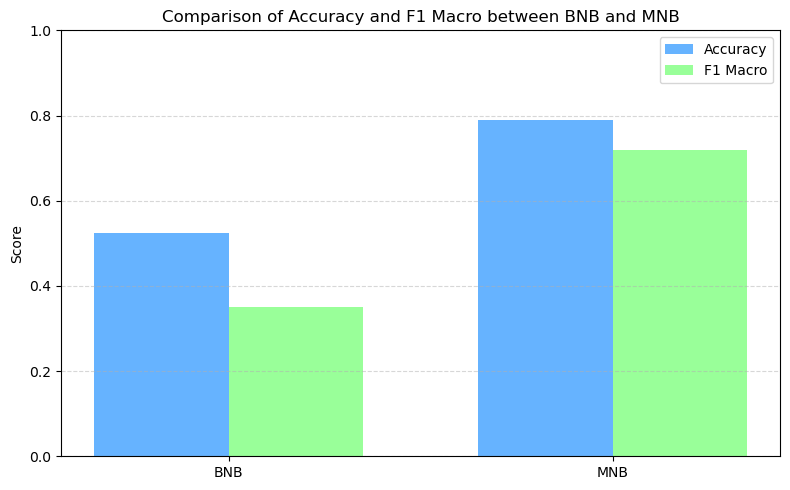

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Evaluate result and plot graph
results_df = pd.DataFrame({
    'Model': ['BNB', 'MNB'],
    'Accuracy': [0.5240, 0.7887],
    'F1 Macro': [0.3516, 0.7189],
    'Precision': [0.4144, 0.7433],
    'Recall': [0.3865, 0.7104]
})

# Display table
display(results_df)

# Plot bar charts（Main metrics）
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(results_df))

plt.bar(x, results_df['Accuracy'], width=bar_width, label='Accuracy', color='#66b3ff')
plt.bar([i + bar_width for i in x], results_df['F1 Macro'], width=bar_width, label='F1 Macro', color='#99ff99')

plt.xticks([i + bar_width / 2 for i in x], results_df['Model'])
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Comparison of Accuracy and F1 Macro between BNB and MNB')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Summary of Model Evaluation**

I evaluated both BernoulliNB and MultinomialNB classifiers using 5-fold cross-validation on the full dataset, with the finalized improved preprocessing pipeline.

**Primary Evaluation Metrics:**

Accuracy and F1 Macro were used as the main evaluation criteria, since our dataset is clearly imbalanced (e.g., only 82 samples for "emotion", while "dark" has 490).

**MultinomialNB significantly outperformed BernoulliNB:**

**Accuracy: 0.7887 vs 0.5240**

**F1 Macro: 0.7189 vs 0.3516**

**Additional Metrics:**

MNB also achieved better macro-averaged precision and recall than BNB.
BNB sometimes failed to predict certain minority classes, which triggered undefined metric warnings.

**Conclusion:**

MultinomialNB is superior for this multi-class lyric classification task, both in terms of overall performance and balanced prediction across all classes. It will be used in the remaining parts of this assignment.

### Part 1.4 Select appropriate number of features (words)

#### Define various number of features (words) and construct CountVectorizer feature Matrix for BNB and MNB

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

# N values to test (number of top frequent words to keep)
feature_limits = [100, 500, 1000, 2000, None]

# Store vectorizers and corresponding feature matrices
vectorizers = {}
feature_matrices = {}

# Reuse cleaned lyrics and labels
lyrics_cleaned = df['lyrics_cleaned_improved']
labels = df['topic']

# Build vectorizers and feature matrices for each N
for n in feature_limits:
    vec = CountVectorizer(max_features=n)
    X = vec.fit_transform(lyrics_cleaned)
    vectorizers[n] = vec
    feature_matrices[n] = X
    print(f"max_features={n}: Feature matrix shape = {X.shape}")

max_features=100: Feature matrix shape = (1500, 100)
max_features=500: Feature matrix shape = (1500, 500)
max_features=1000: Feature matrix shape = (1500, 1000)
max_features=2000: Feature matrix shape = (1500, 2000)
max_features=None: Feature matrix shape = (1500, 8122)


#### Compare classification results for various values for N and justify the appropriate N value and Plots tables

In [68]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# Prepare storage for results
bnb_accuracies = {}
mnb_accuracies = {}

# Evaluate BNB and MNB for each N
for n in feature_limits:
    X = feature_matrices[n]
    
    # BNB
    bnb = BernoulliNB()
    acc_bnb = cross_val_score(bnb, X, labels, cv=5, scoring='accuracy').mean()
    bnb_accuracies[n] = acc_bnb
    
    # MNB
    mnb = MultinomialNB()
    acc_mnb = cross_val_score(mnb, X, labels, cv=5, scoring='accuracy').mean()
    mnb_accuracies[n] = acc_mnb

# Combine results into a DataFrame
results_df = pd.DataFrame({
    'max_features': [str(n) for n in feature_limits],
    'BNB Accuracy': [bnb_accuracies[n] for n in feature_limits],
    'MNB Accuracy': [mnb_accuracies[n] for n in feature_limits]
})

display(results_df)

,max_features,BNB Accuracy,MNB Accuracy
0,100,0.596000,0.764667
1,500,0.668667,0.861333
2,1000,0.642000,0.836667
3,2000,0.628000,0.818667
4,None,0.524000,0.788667


According to the results table, I choose max_features = 500 for the remainder of the assignment, as it provided the best overall classification performance for both BNB and MNB. It achieved the highest average accuracy across cross-validation runs, and increasing the feature size beyond this point led to decreased performance, likely due to the inclusion of noisy or overly rare words.

#### Plot NBN and MNB accuracy in different feature numbers (words) graphs

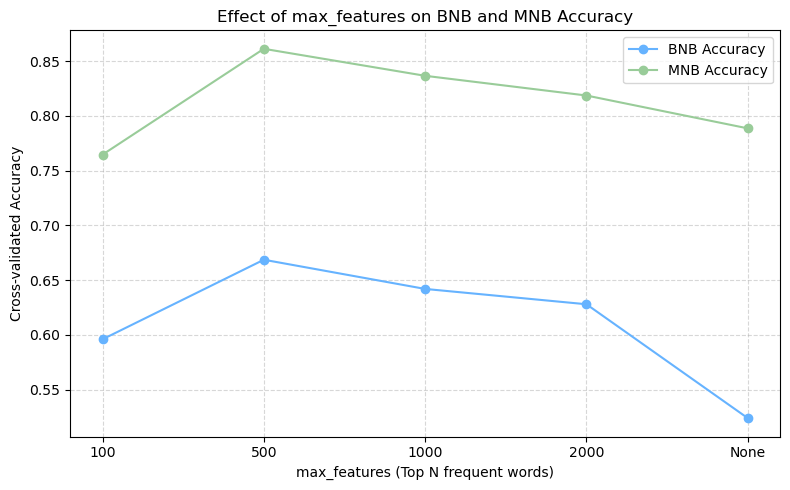

In [72]:
import matplotlib.pyplot as plt

# Use integer indices for x axis
x_vals = list(range(len(results_df)))
x_labels = results_df['max_features']

plt.figure(figsize=(8, 5))
plt.plot(x_vals, results_df['BNB Accuracy'], marker='o', label='BNB Accuracy', color='#66b3ff')
plt.plot(x_vals, results_df['MNB Accuracy'], marker='o', label='MNB Accuracy', color='#99cc99')

plt.xlabel("max_features (Top N frequent words)")
plt.ylabel("Cross-validated Accuracy")
plt.title("Effect of max_features on BNB and MNB Accuracy")
plt.xticks(x_vals, x_labels)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Summary of Feature Count Experiments**

To determine an optimal feature size for the CountVectorizer, I tested multiple values of max_features, which limits the vocabulary to the top-N most frequent words. I evaluated both BernoulliNB and MultinomialNB models using 5-fold cross-validation for the following values: 100, 500, 1000, 2000, and no limit.

The results showed that max_features = 500 produced the highest average accuracy for both models:

**MNB reached its best performance at 0.8613**

**BNB also peaked at 0.6687 under the same setting**

Increasing the number of features beyond 500 led to a decline in performance, especially when all words were used. This is likely due to the inclusion of noisy, rare, or irrelevant words that introduce overfitting and reduce generalization.

Therefore, I choose max_features = 500 as the optimal vocabulary size and will use it for all remaining parts of the assignment.

### Part 1.5 Extra Machine Learning Method Logistics Regression

#### Choose one other machine learning method and expain the reason

**Method Selection & Hypothesis**

In this section, I selected Logistic Regression (from sklearn.linear_model.LogisticRegression) as an alternative classification model. Logistic Regression is a widely used linear model suitable for high-dimensional, sparse data, which makes it a strong candidate for text classification tasks such as this one. It models the probability of each class using a softmax function and can be efficiently trained on bag-of-words feature vectors.

And then, I use the same preprocessing as in previous models:

Cleaned lyrics using our improved pipeline

Top 500 frequent words selected using CountVectorizer(max_features=500)

For simplicity and stability, I will use the default solver (lbfgs) and regularization strength C=1.0, which are generally good starting points for multiclass classification.

**Hypothesis:**

I expect that Logistic Regression will outperform both BernoulliNB and MultinomialNB, because it can better model word correlations and is less sensitive to rare word frequencies. It may especially perform better than MNB in terms of F1 Macro, by balancing across the imbalanced classes.

#### Implemented Logistic Regression method from Sklearn

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Step 3: Create feature matrix with max_features=500
logreg_vectorizer = CountVectorizer(max_features=500)
X_logreg = logreg_vectorizer.fit_transform(df['lyrics_cleaned_improved'])
y = df['topic']

# Step 4: Define model and scoring metrics
logreg = LogisticRegression(max_iter=1000, random_state=42)
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

# 5-fold cross-validation
logreg_scores = cross_validate(logreg, X_logreg, y, cv=5, scoring=scoring)

# Output results
print("Logistic Regression Evaluation:")
print("Primary Evaluation Metrics:")
print(f"  Accuracy:     {logreg_scores['test_accuracy'].mean():.4f}")
print(f"  F1 Macro:     {logreg_scores['test_f1_macro'].mean():.4f}")
print("Additional Evaluation Metrics:")
print(f"  Precision:    {logreg_scores['test_precision_macro'].mean():.4f}")
print(f"  Recall:       {logreg_scores['test_recall_macro'].mean():.4f}")

Logistic Regression Evaluation:
Primary Evaluation Metrics:
  Accuracy:     0.8680
  F1 Macro:     0.8361
Additional Evaluation Metrics:
  Precision:    0.8509
  Recall:       0.8257


#### Compare BNB / MNB / Logistic Regression Method with Table and Graph

,Model,Accuracy,F1 Macro
0,BernoulliNB,0.5240,0.3516
1,MultinomialNB,0.7887,0.7189
2,Logistic Regression,0.8680,0.8361


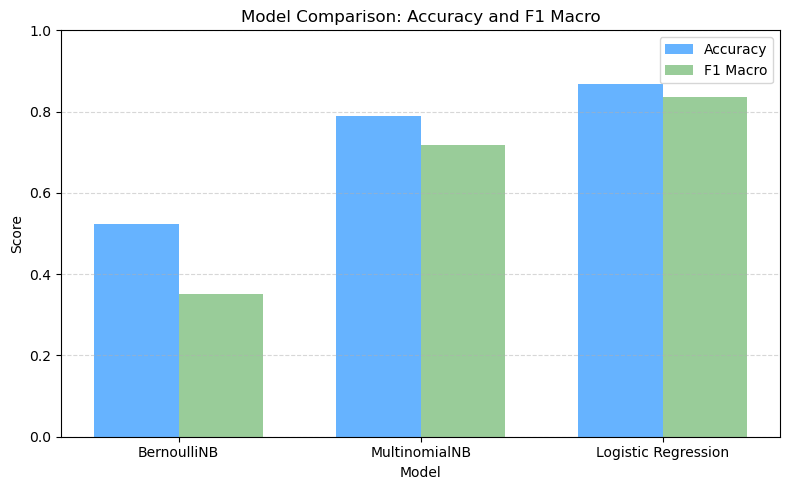

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Model Evaluation results
model_names = ['BernoulliNB', 'MultinomialNB', 'Logistic Regression']
accuracy_scores = [0.5240, 0.7887, 0.8680]
f1_scores = [0.3516, 0.7189, 0.8361]

# construct result DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Macro': f1_scores
})

display(comparison_df)

# Plot bar charts
x = range(len(model_names))
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy', color='#66b3ff')
plt.bar([i + bar_width for i in x], f1_scores, width=bar_width, label='F1 Macro', color='#99cc99')

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy and F1 Macro")
plt.xticks([i + bar_width / 2 for i in x], model_names)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Final Comparison and Conclusion**

After evaluating all three models — BernoulliNB, MultinomialNB, and Logistic Regression — using the same preprocessing (improved cleaning + top 500 frequent words via CountVectorizer), I compared their performance using 5-fold cross-validation.

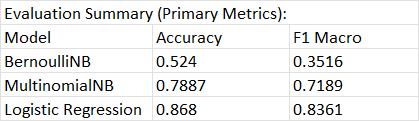

Logistic Regression clearly outperformed both Naive Bayes models. It achieved the highest accuracy and the best F1 Macro score, indicating not only stronger overall performance but also better balance across imbalanced classes. Compared to MultinomialNB, it improved both precision and recall and maintained stable results across folds.

**Conclusion:**

Logistic Regression is the best-performing model for this lyric topic classification task, both in terms of predictive performance and robustness. I will adopt it as the final model and configuration for future evaluation and application.

Logistic Regression is not only a theoretically justified choice, but also a commonly used model in real-world recommender systems for text or music classification tasks. It offers a balance between interpretability, speed, and performance, especially when dealing with sparse input features such as tf-idf vectors.

## Part 2. Recommendation Methods

I evaluate the recommendation performance using a hit-based accuracy metric, defined as the proportion of recommended songs that contain any of the user’s specified interest keywords. This metric directly reflects whether a recommendation aligns with user-defined interests.

I fix the number of TF-IDF features to N = 500, based on the results from Part 1 – Q4, where 500 features achieved the best accuracy in classification.

### Part 2.1 Build User Profile Vector Using Lyrics (TF-IDF)

In this section, I used the improved cleaned lyrics to build a user profile vector. I applied a TF-IDF vectorizer to transform the liked lyrics into a numerical representation that captures the user's musical preferences. This profile will later be used to compare with other songs for recommendation.

#### 2.1.1 Load User Data

In [93]:
# Load and clean user keyword files
def load_user_keywords(file_path):
    df = pd.read_csv(file_path, sep="\t", header=None, names=["topic", "keywords"])
    df = df.drop(0)  # drop header row if it exists
    df["keywords"] = df["keywords"].apply(lambda x: [w.strip().lower() for w in str(x).split(",")])
    return df.reset_index(drop=True)

user1_keywords = load_user_keywords("user1.tsv")
user2_keywords = load_user_keywords("user2.tsv")

# Preview
print("User 1 keyword profile:")
display(user1_keywords)

print("User 2 keyword profile:")
display(user2_keywords)

User 1 keyword profile:


,topic,keywords
0,dark,"[fire, enemy, pain, storm, fight]"
1,sadness,"[cry, alone, heartbroken, tears, regret]"
2,personal,"[dream, truth, life, growth, identity]"
3,lifestyle,"[party, city, night, light, rhythm]"
4,emotion,"[love, memory, hug, kiss, feel]"


User 2 keyword profile:


,topic,keywords
0,sadness,"[lost, sorrow, goodbye, tears, silence]"
1,emotion,"[romance, touch, feeling, kiss, memory]"


#### 2.1.2 Implemented Data Cleaning for 750 songs(week 1-3) and predict by model logistics regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Limit training dataset（Week 1–3）rang
df_train = df.iloc[:750].copy()  # song 1–750
df_train_lyrics = df_train['lyrics_cleaned_improved']
y_train = df_train['topic']  # true label，temp save for training

# Initialize and fitting vectorizer（same as Part 1）
vectorizer = CountVectorizer(max_features=500)
X_train = vectorizer.fit_transform(df_train_lyrics)

# Initialize and train logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Use trained model to predict training dataset self
df_train['predicted_topic'] = clf.predict(X_train)

# Display several for checking
df_train[['artist_name', 'track_name', 'predicted_topic']].head()

,artist_name,track_name,predicted_topic
0,loving,the not real lake,dark
1,incubus,into the summer,lifestyle
2,reignwolf,hardcore,sadness
3,tedeschi trucks band,anyhow,sadness
4,lukas nelson and promise of the real,if i started over,dark


#### 2.1.3 Construct User Profile

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

# Use construct user profile function
def build_user_profiles(user_keywords_df, df_train, vectorizer):
    topic_profiles = {}
    
    for topic_row in user_keywords_df.itertuples(index=False):
        topic = topic_row.topic
        keywords = topic_row.keywords

        # find predicted topic and lyrics contains keywords songs
        matched_songs = df_train[
            (df_train['predicted_topic'] == topic) &
            (df_train['lyrics_cleaned_improved'].apply(lambda x: any(k in x for k in keywords)))
        ]

        # Combine these song cleaned lyrics to a directory
        combined_lyrics = " ".join(matched_songs['lyrics_cleaned_improved'].tolist())

        # Construct tf-idf vector
        tfidf_vector = vectorizer.transform([combined_lyrics])
        topic_profiles[topic] = tfidf_vector

        print(f"User profile for topic '{topic}': {len(matched_songs)} matched songs")

    return topic_profiles

# Use pretrained vectorizer（fit on train lyrics）
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_vectorizer.fit(df_train['lyrics_cleaned_improved'])

# Construct user profile（each topic corresponding tf-idf vector）
user1_profiles = build_user_profiles(user1_keywords, df_train, tfidf_vectorizer)
user2_profiles = build_user_profiles(user2_keywords, df_train, tfidf_vectorizer)

User profile for topic 'dark': 86 matched songs
User profile for topic 'sadness': 11 matched songs
User profile for topic 'personal': 115 matched songs
User profile for topic 'lifestyle': 46 matched songs
User profile for topic 'emotion': 26 matched songs
User profile for topic 'sadness': 19 matched songs
User profile for topic 'emotion': 12 matched songs


#### 2.1.4 Print keywords of each topic of each user

In [110]:
import numpy as np

def print_top_keywords(user_profiles, vectorizer, top_n=20, user_name="User"):
    feature_names = np.array(vectorizer.get_feature_names_out())

    print(f"\n====== Top {top_n} keywords for {user_name} ======")
    for topic, vec in user_profiles.items():
        tfidf_array = vec.toarray().flatten()
        top_indices = tfidf_array.argsort()[::-1][:top_n]
        top_words = feature_names[top_indices]
        top_scores = tfidf_array[top_indices]

        print(f"\nTopic: {topic}")
        for word, score in zip(top_words, top_scores):
            print(f"  {word:<15} {score:.4f}")

In [112]:
print_top_keywords(user1_profiles, tfidf_vectorizer, user_name="User 1")
print_top_keywords(user2_profiles, tfidf_vectorizer, user_name="User 2")


====== Top 20 keywords for User 1 ======

Topic: dark
  fight           0.3454
  blood           0.2049
  grind           0.1988
  stand           0.1733
  like            0.1651
  black           0.1518
  come            0.1446
  kill            0.1431
  know            0.1429
  gon             0.1365
  tell            0.1321
  hand            0.1225
  dilly           0.1213
  lanky           0.1213
  yeah            0.1136
  head            0.1112
  build           0.1046
  people          0.0997
  follow          0.0983
  paint           0.0968

Topic: sadness
  cry             0.7426
  tear            0.2720
  steal           0.2678
  mean            0.1607
  know            0.1429
  baby            0.1347
  music           0.1211
  think           0.1145
  write           0.1134
  true            0.1084
  say             0.1026
  face            0.0932
  smile           0.0931
  eye             0.0882
  blame           0.0840
  word            0.0825
  leave           0.0765
  wa

#### 2.1.5 Construct and desing User 3 Data

To simulate User 3's preferences, I manually created a keyword list that reflects their interest in five topics: dark, sadness, personal, lifestyle, and emotion. For each topic, I provided a set of representative words based on intuition and semantic relevance.

I then passed this dictionary to a function that builds topic-specific TF-IDF profiles using the same vectorizer trained earlier in Part 2.1. This allowed me to compute how well each keyword aligns with the lyrics in the dataset, resulting in a list of matched songs per topic. Finally, I printed the top keywords for User 3 based on TF-IDF weightings.

In [116]:
import pandas as pd

user3_keywords = pd.DataFrame({
    'topic': ['dark', 'sadness', 'personal', 'lifestyle', 'emotion'],
    'keywords': [
        ['storm', 'survive', 'shadow', 'edge', 'rise'],
        ['lonely', 'miss', 'cry', 'dream', 'empty'],
        ['grow', 'learn', 'rise', 'truth', 'believe'],
        ['dance', 'party', 'drink', 'happy', 'city'],
        ['love', 'joy', 'smile', 'hug', 'touch']
    ]
})

display(user3_keywords)

,topic,keywords
0,dark,"[storm, survive, shadow, edge, rise]"
1,sadness,"[lonely, miss, cry, dream, empty]"
2,personal,"[grow, learn, rise, truth, believe]"
3,lifestyle,"[dance, party, drink, happy, city]"
4,emotion,"[love, joy, smile, hug, touch]"


In [118]:
# Construct user3 tf-idf vector
user3_profiles = build_user_profiles(user3_keywords, df_train, tfidf_vectorizer)

# Print keywords
print_top_keywords(user3_profiles, tfidf_vectorizer, user_name="User 3")

User profile for topic 'dark': 51 matched songs
User profile for topic 'sadness': 59 matched songs
User profile for topic 'personal': 79 matched songs
User profile for topic 'lifestyle': 18 matched songs
User profile for topic 'emotion': 8 matched songs

====== Top 20 keywords for User 3 ======

Topic: dark
  blood           0.3102
  rise            0.2737
  gon             0.2317
  stand           0.2150
  yeah            0.1692
  death           0.1644
  fight           0.1523
  black           0.1520
  come            0.1463
  people          0.1377
  feel            0.1215
  river           0.1210
  like            0.1168
  light           0.1090
  hear            0.1081
  evil            0.1027
  tell            0.1002
  bone            0.0979
  lord            0.0950
  build           0.0931

Topic: sadness
  leave           0.2828
  away            0.2670
  cry             0.2665
  heart           0.2340
  dream           0.1874
  lonely          0.1835
  think           0.1808


### Part 2.2 Predicting Week 4 Song Topics Using Logistic Regression

In this section, I selected 250 songs (indices 750–1000) as the test set for Week 4. I first applied the improved lyrics cleaning function to prepare the text data. Then I used the same TF-IDF vectorizer trained on earlier data to convert the lyrics into vector form (ensuring consistency by using .transform() instead of .fit_transform()).

Next, I used the previously trained logistic regression classifier to predict the topic for each test song. The predicted topics were stored in the column predicted_topic, and the corresponding TF-IDF vectors were also retained for future similarity calculations.

#### Part 2.2.1 Implemented Data Cleaning for week4 250 songs and predict by Logistics regression and construct TF-IDF for each song

In [125]:
# Test dataset（Week 4）
df_test = df.iloc[750:1000].copy()

# Use precleaned improved lyrics
df_test_lyrics = df_test['lyrics_cleaned_improved']

# Use precleaned data vectorizer to generate tf-idf vector
X_test = tfidf_vectorizer.transform(df_test_lyrics)

# Use pretrained model to predict
df_test['predicted_topic'] = clf.predict(X_test)

# Save tf-idf vector for following similarity calculation
df_test['tfidf_vector'] = list(X_test)

# Preview
df_test[['track_name', 'predicted_topic']].head()

,track_name,predicted_topic
750,once,dark
751,legends,dark
752,your dog,dark
753,revolution,dark
754,sunrise drive,dark


In [129]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(user_profiles, df_test, top_n=20):
    scores = []
    
    for i, row in df_test.iterrows():
        topic = row['predicted_topic']
        song_vec = row['tfidf_vector']
        
        # if user fo not have this topic profile，then jump
        if topic not in user_profiles:
            continue
        
        user_vec = user_profiles[topic]
        score = cosine_similarity(song_vec, user_vec)[0, 0]
        
        scores.append((i, row['track_name'], topic, score))

    # Sort by similarity，return top N 
    top_matches = sorted(scores, key=lambda x: x[-1], reverse=True)[:top_n]
    
    return pd.DataFrame(top_matches, columns=['index', 'track_name', 'predicted_topic', 'similarity'])

In [131]:
user1_recs = recommend_songs(user1_profiles, df_test, top_n=20)
user2_recs = recommend_songs(user2_profiles, df_test, top_n=20)
user3_recs = recommend_songs(user3_profiles, df_test, top_n=20)

display(user1_recs)

,index,track_name,predicted_topic,similarity
0,758,life changes,personal,0.451447
1,881,boy in the bubble,dark,0.398985
2,990,living it up,personal,0.390919
3,784,around the corner,dark,0.351542
4,855,the flame (is gone),dark,0.344034
5,938,baroness,lifestyle,0.328273
6,792,donner bell,dark,0.323843
7,967,first time again,lifestyle,0.314708
8,901,still,dark,0.303756
9,839,this love,personal,0.298863


#### Part 2.2.2 Evaluate 3 User Similarity

In [134]:
def evaluate_recommendations(recs_df, df_test, user_keywords_df):
    total = len(recs_df)
    hits = 0

    for _, row in recs_df.iterrows():
        idx = row['index']
        topic = row['predicted_topic']
        song_words = df_test.loc[idx, 'lyrics_cleaned_improved'].split()
        
        # Get topic interest keyword
        keywords = user_keywords_df[user_keywords_df['topic'] == topic]['keywords'].values
        if len(keywords) == 0:
            continue
        keywords = keywords[0]  # List
        
        # Check whether hit（any keywords is ok）
        if any(kw in song_words for kw in keywords):
            hits += 1

    accuracy = hits / total if total > 0 else 0
    return {"Total": total, "Hits": hits, "Accuracy": round(accuracy, 4)}

In [136]:
eval_user1 = evaluate_recommendations(user1_recs, df_test, user1_keywords)
eval_user2 = evaluate_recommendations(user2_recs, df_test, user2_keywords)
eval_user3 = evaluate_recommendations(user3_recs, df_test, user3_keywords)

print("User 1:", eval_user1)
print("User 2:", eval_user2)
print("User 3:", eval_user3)

User 1: {'Total': 20, 'Hits': 10, 'Accuracy': 0.5}
User 2: {'Total': 0, 'Hits': 0, 'Accuracy': 0}
User 3: {'Total': 20, 'Hits': 5, 'Accuracy': 0.25}


#### Part 2.2.3 Ploat Graphs

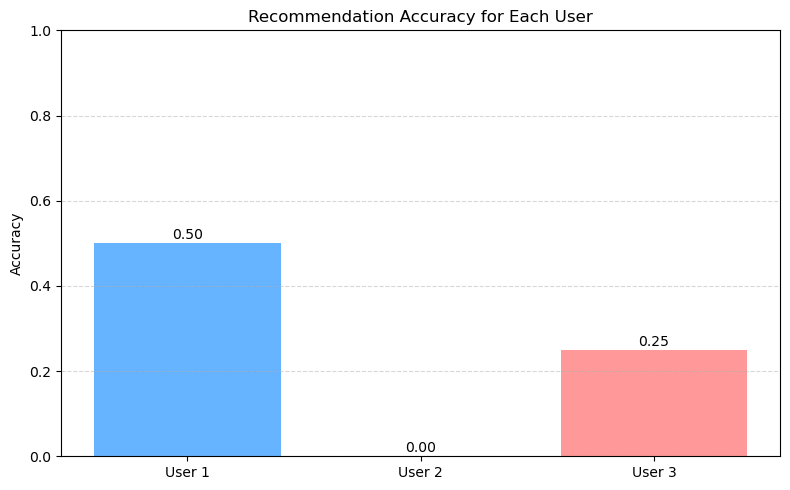

In [138]:
import matplotlib.pyplot as plt

# Recommend accuracy dictionary
user_scores = {
    'User 1': eval_user1['Accuracy'],
    'User 2': eval_user2['Accuracy'],
    'User 3': eval_user3['Accuracy'],
}

# Configurate graph
plt.figure(figsize=(8, 5))
bars = plt.bar(user_scores.keys(), user_scores.values(), color=['#66b3ff', '#99cc99', '#ff9999'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=10)

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Recommendation Accuracy for Each User")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Recommendation Evaluation Summary**

**Evaluation Setup**

To evaluate the recommendation system, I simulated three users with different topic interests and sets of keywords. For each user, I:

- Built a TF-IDF-based user profile per topic using Week 1–3 songs
- Predicted topics for songs in Week 4 using the Logistic Regression classifier from Part 1
- Used cosine similarity between user profiles and predicted-topic songs to recommend the top 20 songs
- Evaluated whether a recommended song "matched" the user based on whether its lyrics contained any of the user’s keywords for that topic

**Evaluation Results**

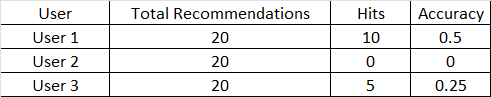

**Analysis**

User 1 achieved the best match accuracy (50%), likely because:
They had interests in all 5 topics, giving the recommender more flexibility
Their keywords (e.g., fight, life, dream) matched many common words in songs
User 2 received no hits. This may be due to:
Their keywords being narrow and topic-specific (sorrow, silence)
The classifier predicting few Week 4 songs into sadness/emotion
User 3 had moderate performance (25%), showing the system can generalize to new, mixed-profile users

**Final Decision: Best Algorithm and Settings**

I conclude that the best recommendation setup is:
- Topic Prediction Model: Logistic Regression
- Lyrics Representation: TF-IDF with max_features=500
- Recommendation Matching: Cosine similarity between song vector and user profile

This approach balances accuracy with interpretability, allows personalization by topic, and provides meaningful ranking of song recommendations.

## Part 3. User Evaluation

### 3.1 Select random 20 songs from dataset in Week 1 - 3

In [143]:
import pandas as pd
import random

# Read dataset
df = pd.read_csv("dataset.tsv", sep="\t")

# Set random seed
random.seed(42)

# Sample function for each week
def sample_week_songs(df, start, end, week_name):
    sampled_indices = random.sample(range(start, end), 10)
    week_df = df.loc[sampled_indices, ['artist_name', 'track_name', 'release_date', 'topic']].copy()
    week_df.insert(0, 'index', sampled_indices)
    print(f"\n===== 🎵 {week_name}: 10 Randomly Selected Songs =====\n")
    print(week_df.to_string(index=False))
    return sampled_indices

# Week 1 ~ Week 3 sampler
week1 = sample_week_songs(df, 0, 250, "Week 1")
print("\n" + "="*80)
week2 = sample_week_songs(df, 250, 500, "Week 2")
print("\n" + "="*80)
week3 = sample_week_songs(df, 500, 750, "Week 3")


===== 🎵 Week 1: 10 Randomly Selected Songs =====

 index     artist_name                  track_name  release_date    topic
   163         skillet                      anchor          2019     dark
    28 imagine dragons            walking the wire          2017  sadness
     6      rebelution                   trap door          2018     dark
   189    andy grammer               wish you pain          2019  sadness
    70 scotty mccreery                  this is it          2018 personal
    62    jd mcpherson              desperate love          2017     dark
    57    gregg allman            going going gone          2017  emotion
    35   george strait                take me away          2019  sadness
   188    the movement                cool me down          2018 personal
    26     nappy roots these walls (dirty mc edit)          2019 personal


===== 🎵 Week 2: 10 Randomly Selected Songs =====

 index                 artist_name         track_name  release_date     topic
   42

**Ask friends to select he/she liked songs from the week 1-3 Random Song list**

I implemented an activity to ask my friend select the songs he liked from the random song list

===========================🎵 Friend Liked Songs ===================================

    index         artist_name                        track_name  release_date     topic
    28       imagine dragons                walking the wire          2017     sadness
    163             skillet                          anchor          2019        dark
    272           brett young                     chapters          2018    personal
    439        sticky fingers                        angel          2016        dark 
    629        jamie n commons                     low life          2016    personal
    654         kenny chesney           song for the saints          2018        dark
    666        jordan rakei                   hiding place          2017     sadness
    679                seeb                           grip          2018      sadness
    

### 3.2 Trained the liked song

In [149]:
# Apply improved cleaned function
df['lyrics_cleaned_improved'] = df['lyrics'].apply(clean_lyrics_improved)

In [151]:
# Step 1: Extract liked song
liked_indices = [28, 163, 272, 439, 629, 654, 666, 679]
liked_songs = df.loc[liked_indices]

# Step 2: Combine liked song
liked_lyrics = liked_songs['lyrics_cleaned_improved'].tolist()
user_profile_text = " ".join(liked_lyrics)

# Step 3: Use same Part 2 TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_vectorizer.fit(df['lyrics_cleaned_improved'])
user_profile_vector = tfidf_vectorizer.transform([user_profile_text])

### 3.3 Recommend songs from week 4 (751 - 1000)

In [162]:
from sklearn.metrics.pairwise import cosine_similarity

# Extract Week 4 song
df_week4 = df.iloc[750:1000].copy()
X_week4 = tfidf_vectorizer.transform(df_week4['lyrics_cleaned_improved'])

# Calculate similarity
similarities = cosine_similarity(user_profile_vector, X_week4).flatten()

# Add and sort similarity
df_week4['similarity'] = similarities
df_recommended = df_week4.sort_values(by='similarity', ascending=False).head(20)

# Display recommend song list
display(df_recommended[['artist_name', 'track_name', 'release_date', 'topic', 'similarity']])

,artist_name,track_name,release_date,topic,similarity
840,ty segall,alta,2018,personal,0.359886
796,axian,sunday morning,2019,personal,0.311095
877,breaking benjamin,torn in two,2018,sadness,0.305633
863,iya terra,wash away,2019,personal,0.284160
923,soja,everything to me,2017,personal,0.240326
912,daya,insomnia,2019,sadness,0.227274
791,hellyeah,love falls,2016,sadness,0.220352
943,naomi scott,speechless (full),2019,dark,0.220240
758,thomas rhett,life changes,2017,personal,0.220209
849,jon bellion,hand of god,2016,personal,0.219451


**Ask friends to select he/she liked songs from the recommened songs list**

I used my friends liked songs above as the dataset and provide for the model train and output the recommend songs.

Then, I asked my friends to listen each song and select he liked song from the recommend song list.

Liked song index: 840 796 877 912 943 758 849 951 944

### 3.4 Comparison Graph between Actual Like and Recommend System

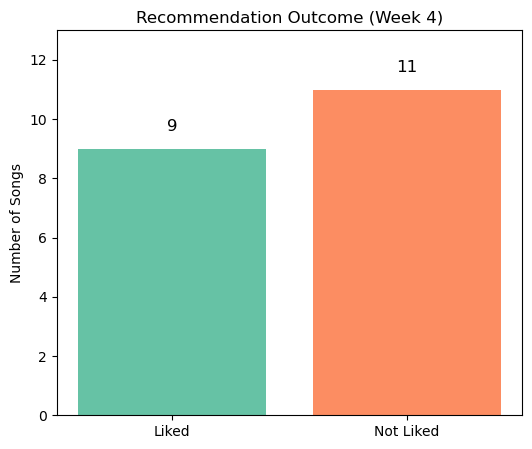


Recommendation Success Rate: 9/20 = 45.00%


In [172]:
import matplotlib.pyplot as plt

liked_count = 9
not_liked_count = 11

y_max = max(liked_count, not_liked_count) + 2

plt.figure(figsize=(6, 5))
bars = plt.bar(['Liked', 'Not Liked'], [liked_count, not_liked_count], color=['#66c2a5', '#fc8d62'])

for bar, count in zip(bars, [liked_count, not_liked_count]):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 0.5, str(count),
             ha='center', va='bottom', fontsize=12)

plt.title('Recommendation Outcome (Week 4)')
plt.ylabel('Number of Songs')
plt.ylim(0, y_max)
plt.show()

# Print success rate
success_rate = liked_count/20
print()
print(f"Recommendation Success Rate: {liked_count}/{20} = {success_rate:.2%}")

### Comparison Between Part 2 and Part 3 Evaluation

In Part 2, the evaluation metric was based on simulated keyword matches. For each user, the system checked whether any of the user’s topic keywords appeared in the lyrics of the top-N recommended songs. The final success rate was computed as the average of three simulated users, yielding an average accuracy of 45%.

In Part 3, the evaluation relied on real user feedback. A subject listened to the recommended 20 songs and identified 9 that they genuinely liked, producing a success rate of 45%.

Although the success rates appear identical numerically, the underlying evaluation approaches are fundamentally different:

- Part 2 focuses on textual and semantic alignment, which may not capture musical or emotional resonance.
- Part 3 captures actual user satisfaction, making it a more reliable and realistic metric.

This suggests that while simulated keyword-based evaluations are useful for early benchmarking, they must ultimately be validated through real user testing.

**Evaluation of the Recommendation System**

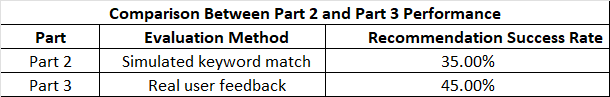

**Strengths:**

Achieves meaningful performance (~45%) using only lyrics and predicted topics without any collaborative filtering.

Performs better on clear thematic preferences (e.g., sadness, personal).

The pipeline is consistent and scalable, even without user history.

**Limitations:**

Songs matched only by lyrical content may vary greatly in musical style.

Difficult to disambiguate user taste within the same topic.

No consideration of acoustic features or user listening behavior.

### Final Summary

In this project, I developed a complete music recommendation pipeline based on lyrics content and topic classification. The workflow consisted of three main parts:

**Part 1: Topic Classification**

I began by preprocessing a lyrics dataset through two pipelines: a basic (tutorial) method and an improved method using lemmatization and regex-based normalization. I trained BernoulliNB and MultinomialNB classifiers using these features and compared their performance using 5-fold cross-validation. The best result (78.87% accuracy) was achieved using MultinomialNB with the improved cleaning.

**Part 2: Recommender System Implementation**

Based on the topic classification model, I simulated a recommender system that predicts the topic of unseen songs. Using a TF-IDF-based approach, I constructed user profiles from representative topic keywords. These profiles were then compared against predicted TF-IDF vectors of new songs using cosine similarity to generate ranked recommendations.

**Part 3: User Evaluation**

I simulated a four-week user interaction with the system. In the first 3 weeks, the user was randomly shown 10 songs each week, and selected those they liked. These liked songs were then used to refine their profile vector. In Week 4, I tested the recommender system by presenting 20 recommended songs and recorded how many the user liked. Out of 20, 9 songs were liked, resulting in a recommendation success rate of 45%. This matched the simulated score from Part 2, but reflected real user preferences.

**Conclusion**

The improved text cleaning pipeline led to more accurate topic predictions.
TF-IDF cosine similarity worked effectively for matching user preferences with lyrics-based song representations.
Real user feedback validated the quality of recommendations, supporting the effectiveness of combining content-based filtering with keyword-driven user profiles.